In [3]:
#载入数据并查看数据集基本信息
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 

In [5]:
df = pd.read_csv('vgsales.csv')

In [7]:
#查看数据前五行
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [15]:
#查看行列数
df.shape
#查看列名
df.columns
#查看是否存在重复行
df.duplicated().sum()
#查看是否存在缺失值
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [19]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [21]:
sales = df.copy()

In [23]:
#查看数据集中缺失值的位置
sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [25]:
#计算缺失值的总数
sales.isna().sum().sum()

329

In [27]:
#计算缺失值所在行占总行数的比重
"%.2f%%" % (sales.isna().sum().sum()/sales.shape[0]*100)

'1.98%'

In [29]:
#用replace将字符串nan替代为真正的缺失值np.nan，再进行dropna
sales.replace("nan", np.nan, inplace=True)

sales = sales.dropna()

#查看过滤掉缺失值后的结果
sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [31]:
#查看删去空值所在行后的行列数
sales.shape


(16291, 11)

In [33]:
#将year的数据类型转换为int
sales['Year'] = sales['Year'].astype('int32', errors='ignore')

#查看转换后的数据类型
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [35]:
#统计数据集中各类型游戏的数量
genre = pd.DataFrame(sales["Genre"].value_counts())

Text(0.5, 1.0, 'Sales share of games by genres')

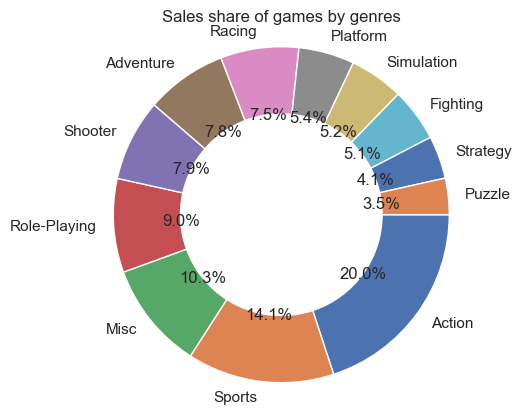

In [41]:
#绘制环形图
fig = plt.figure(), plt.pie(np.array(genre).ravel(), labels = genre.index, autopct = '%1.1f%%', counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

plt.title('Sales share of games by genres')

In [43]:
genre_NA = pd.DataFrame(sales["NA_Sales"].groupby(sales["Genre"]).sum()).sort_values(by = "NA_Sales", ascending = False)


Text(0.5, 1.0, 'Sales of different genres of games in the North American market')

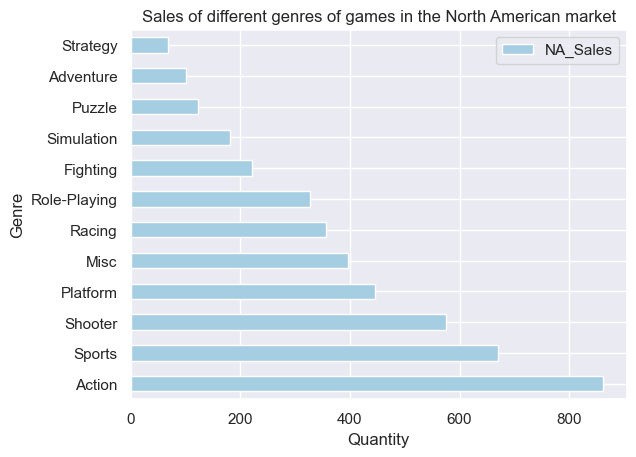

In [51]:
#绘制北美市场各类游戏销量的条形图
ax = genre_NA.plot.barh(rot = 0, cmap='Paired')

ax.set_xlabel('Quantity')

ax.set_title('Sales of different genres of games in the North American market')

In [53]:
genre_EU = pd.DataFrame(sales['EU_Sales'].groupby(sales['Genre']).sum()).sort_values(by = 'EU_Sales', ascending = False)

[Text(0.5, 1.0, 'Sales of different genres of games in the European market'),
 Text(0.5, 0, 'Quantity')]

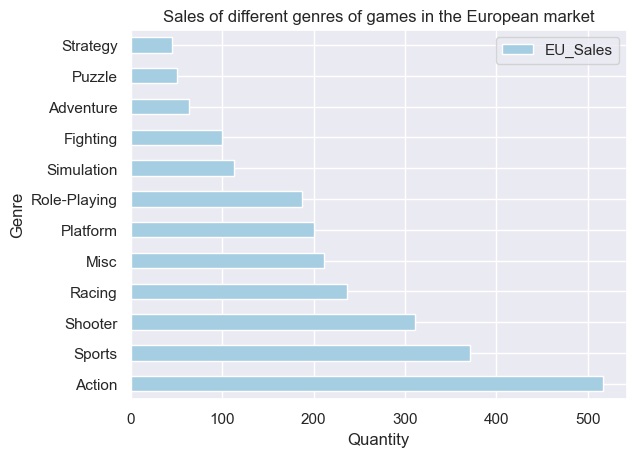

In [55]:
#绘制欧洲市场各类游戏销量的条形图
ax = genre_EU.plot.barh(rot = 0, cmap='Paired')

props = {
    'title': 'Sales of different genres of games in the European market', 
    'xlabel': 'Quantity'
}
ax.set(**props)

In [57]:
genre_JP = pd.DataFrame(sales['JP_Sales'].groupby(sales['Genre']).sum()).sort_values(by = 'JP_Sales', ascending = False)

[Text(0.5, 1.0, 'Sales of different genres of games in the Japanese market'),
 Text(0.5, 0, 'Quantity')]

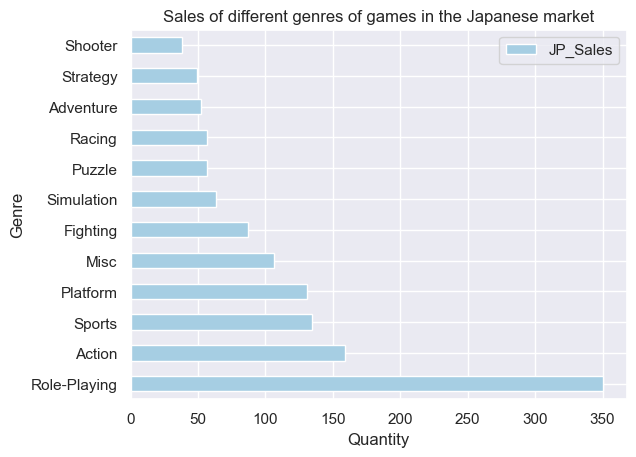

In [59]:
#绘制日本市场各类游戏销量的条形图
ax = genre_JP.plot.barh(rot = 0, cmap='Paired')

props = {
    'title': 'Sales of different genres of games in the Japanese market', 
    'xlabel': 'Quantity'
}
ax.set(**props)

In [61]:
platform = pd.DataFrame(sales['Platform'].value_counts())

Text(0.5, 1.0, 'Number of popular games by platform')

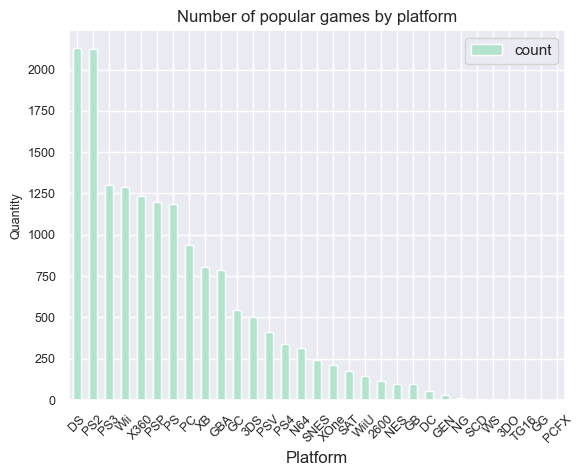

In [63]:
ax = platform.plot.bar(rot = 45, cmap = "Pastel2", fontsize = 9)

ax.set_ylabel('Quantity', fontsize = 9)

ax.set_title('Number of popular games by platform')

In [65]:
publisher = pd.DataFrame(sales['Global_Sales'].groupby(sales['Publisher']).sum()).sort_values(by = 'Global_Sales', ascending = False)

In [67]:
publisher_NA = pd.DataFrame(sales['NA_Sales'].groupby(sales['Publisher']).sum()).sort_values(by = 'NA_Sales', ascending = False)

In [69]:
publisher_EU = pd.DataFrame(sales['EU_Sales'].groupby(sales['Publisher']).sum()).sort_values(by = 'EU_Sales', ascending = False)

In [71]:
publisher_JP = pd.DataFrame(sales['JP_Sales'].groupby(sales['Publisher']).sum()).sort_values(by = 'JP_Sales', ascending = False)

In [73]:
sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [75]:
#将数据进行分箱，每五年为一个时间段（由于数据为右侧开放，因此将最大值设定为2021，即最后一个时间段包含2020，不包含2021）
bins = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2021]

cats = pd.cut(sales['Year'], bins, right = False)

In [77]:
year = pd.DataFrame(pd.value_counts(cats))    

C:\Users\happy\AppData\Local\Temp\ipykernel_44420\3912377612.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  year = pd.DataFrame(pd.value_counts(cats))


Text(0.5, 1.0, 'Number of video game releases each period')

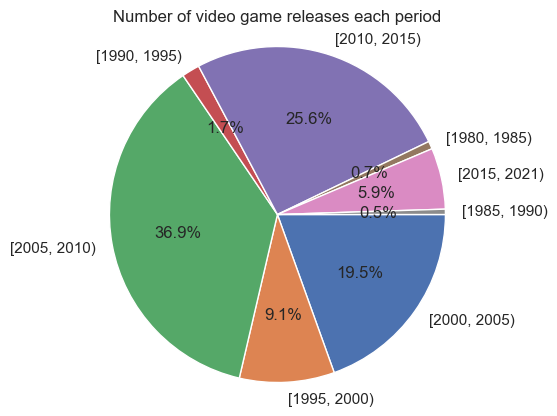

In [81]:
#为避免下一步绘制饼图时数据标签重叠，在此处打乱表格顺序
years = year.sample(frac = 1)

#绘制饼图
fig = plt.figure(), plt.pie(np.array(years).ravel(), labels = years.index, autopct = '%1.1f%%', counterclock = False);
plt.axis('square')

plt.title('Number of video game releases each period')

In [83]:
year_sales = sales.pivot_table('Global_Sales', index = cats, columns = 'Genre', aggfunc = 'sum')

C:\Users\happy\AppData\Local\Temp\ipykernel_44420\974996159.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  year_sales = sales.pivot_table('Global_Sales', index = cats, columns = 'Genre', aggfunc = 'sum')


In [85]:
years_pop = year_sales.idxmax(axis = 'columns')

In [87]:
top15 = sales.head(15)

In [89]:
top15_genre = pd.DataFrame(top15['Genre'].value_counts())

[Text(0.5, 1.0, "Top 15 video games' genres"),
 Text(0.5, 0, 'Quantity'),

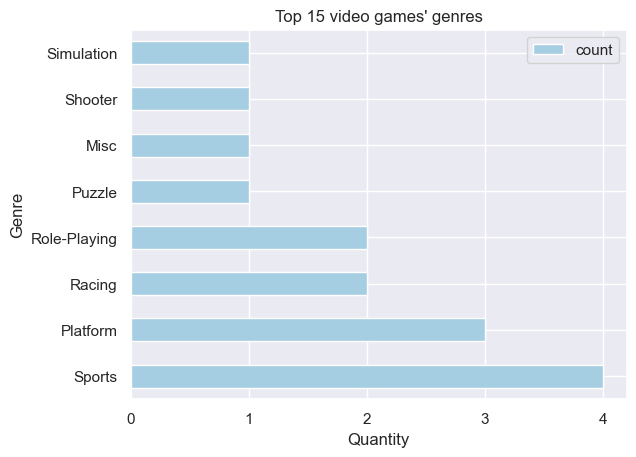

In [91]:
ax = top15_genre.plot.barh(rot = 0, cmap='Paired')

props = {
    'title': "Top 15 video games' genres", 
    'xlabel': 'Quantity', 
    'xticks':[0, 1, 2, 3, 4]
}
ax.set(**props)

In [93]:
top15_platform = pd.DataFrame(top15['Platform'].value_counts())

Text(0.5, 1.0, "Top 15 games' release platforms")

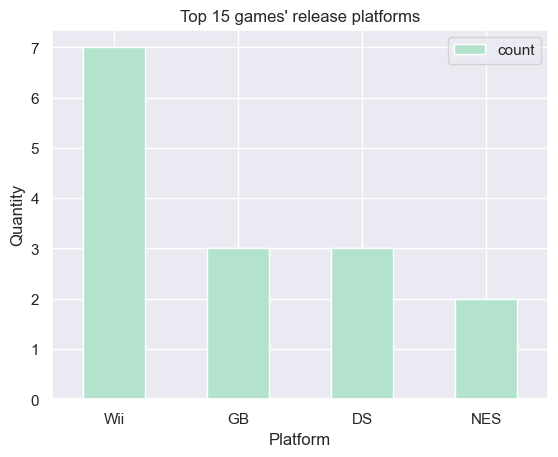

In [95]:
ax = top15_platform.plot.bar(rot = 0, cmap = "Pastel2")

ax.set_ylabel('Quantity')

ax.set_title("Top 15 games' release platforms")

In [99]:
#查看这15款游戏在几大市场的销售表现
print("Total sales of the top 15 games in the North American market: ", round((top15['NA_Sales'].sum()), 2), "millions" )
print("Total sales of the top 15 games in the European market: ", round((top15['EU_Sales'].sum()), 2), "millions" )
print("Total sales of the top 15 games in the Japanese market: ", round((top15['JP_Sales'].sum()), 2), "millions" )
print("Total sales of the top 15 games in the Others market: ", round((top15['Other_Sales'].sum()), 2), "millions" )


Total sales of the top 15 games in the North American market:  249.48 millions
Total sales of the top 15 games in the European market:  135.13 millions
Total sales of the top 15 games in the Japanese market:  65.89 millions
Total sales of the top 15 games in the Others market:  34.88 millions
